In [96]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
plt.style.use('ggplot')

In [82]:
columns = [
    'create_follower_count', 
    'destroy_follower_count', 
    'mutual_friends_count', 
    'followers_count', 
    'inactive_count', 
    'ff_ratio'
]

df = pd.read_csv("./twitter.csv", index_col='date', parse_dates=True)[columns]
df

,create_follower_count,destroy_follower_count,mutual_friends_count,followers_count,inactive_count,ff_ratio
date,,,,,,
2020-08-17,2,2,583,961,138,1.52540
2020-08-18,4,4,584,961,139,1.52298
2020-08-19,0,2,584,959,140,1.51981
2020-08-20,5,4,587,960,140,1.51420
2020-08-21,9,0,590,969,143,1.52119
...,...,...,...,...,...,...
2021-08-13,5,5,658,3521,127,5.14766
2021-08-14,13,4,660,3530,128,5.13828
2021-08-15,28,9,662,3549,125,5.15094


In [83]:
# 平均成長率
def getAverageGrowthRate(timeSeries: pd.Series) -> float:
    growth = timeSeries.pct_change().dropna() \
        .apply(lambda change: change + 1)
    return stats.gmean(growth)

In [92]:
initialValue = df.followers_count[0]

monthlyTimeSeries = df.followers_count.diff().dropna() \
    .resample('M').sum() \
    .cumsum() \
    .apply(lambda count: count + initialValue)

growths = getAverageGrowthRate(monthlyTimeSeries)

print(f'フォロワー数(月次)の平均成長率: {growths*100:.3f}%')
print(f'フォロワー数(月次)の平均変化率: {(growths - 1)*100:.3f}%')
pd.DataFrame(monthlyTimeSeries)

フォロワー数(月次)の平均成長率: 110.675%
フォロワー数(月次)の平均変化率: 10.675%


,followers_count
date,
2020-08-31,1054.0
2020-09-30,1196.0
2020-10-31,1185.0
2020-11-30,1185.0
2020-12-31,1413.0
2021-01-31,1479.0
2021-02-28,1551.0
2021-03-31,1709.0
2021-04-30,2318.0


In [85]:
initialValue = df.ff_ratio[0]

monthlyTimeSeries = df.ff_ratio.diff().dropna() \
    .resample('M').sum() \
    .cumsum() \
    .apply(lambda count: count + initialValue)

growths = getAverageGrowthRate(monthlyTimeSeries)

print(f'FF比(月次)の平均成長率: {growths*100:.3f}%')
print(f'FF比(月次)の平均変化率: {(growths - 1)*100:.3f}%')
pd.DataFrame(monthlyTimeSeries)

FF比(月次)の平均成長率: 110.322%
FF比(月次)の平均変化率: 10.322%


,ff_ratio
date,
2020-08-31,1.58735
2020-09-30,1.76401
2020-10-31,1.75296
2020-11-30,1.76339
2020-12-31,2.36683
2021-01-31,2.46912
2021-02-28,2.54680
2021-03-31,2.77435
2021-04-30,3.64465


In [86]:
monthlyTimeSeries = df.create_follower_count.resample('M').sum()
growths = getAverageGrowthRate(monthlyTimeSeries)

print(f'新規フォロワー数(月次)の平均成長率: {growths*100:.3f}%')
print(f'新規フォロワー数(月次)の平均変化率: {(growths - 1)*100:.3f}%')
pd.DataFrame(monthlyTimeSeries)

新規フォロワー数(月次)の平均成長率: 108.562%
新規フォロワー数(月次)の平均変化率: 8.562%


,create_follower_count
date,
2020-08-31,125
2020-09-30,205
2020-10-31,37
2020-11-30,41
2020-12-31,290
2021-01-31,138
2021-02-28,117
2021-03-31,227
2021-04-30,698


In [93]:
monthlyTimeSeries = df.destroy_follower_count.resample('M').sum()
growths = getAverageGrowthRate(monthlyTimeSeries)

print(f'解除フォロワー数(月次)の平均成長率: {growths*100:.3f}%')
print(f'解除フォロワー数(月次)の平均変化率: {(growths - 1)*100:.3f}%')
pd.DataFrame(monthlyTimeSeries)

解除フォロワー数(月次)の平均成長率: 110.142%
解除フォロワー数(月次)の平均変化率: 10.142%


,destroy_follower_count
date,
2020-08-31,32
2020-09-30,63
2020-10-31,48
2020-11-30,41
2020-12-31,62
2021-01-31,72
2021-02-28,45
2021-03-31,69
2021-04-30,90


In [88]:
# 傾向変動
def plotMovingAverage(timeSeries: pd.Series) -> pd.Series:
    return timeSeries \
        .rolling(7, center=True).mean().dropna() \
        .rolling(30, center=True).mean().dropna() \
        .plot()

<AxesSubplot:xlabel='date'>

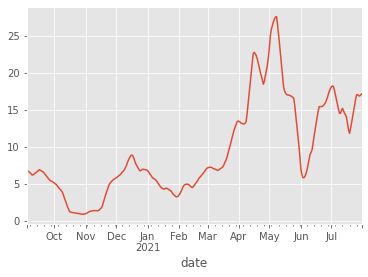

In [89]:
# 新規フォロワー数
plotMovingAverage(df.create_follower_count)

<AxesSubplot:xlabel='date'>

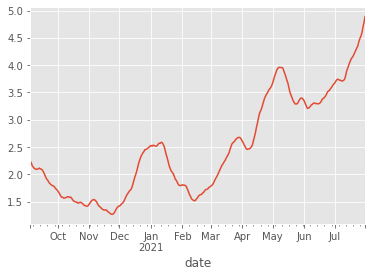

In [90]:
# フォロワー解除数
plotMovingAverage(df.destroy_follower_count)

<AxesSubplot:xlabel='date'>

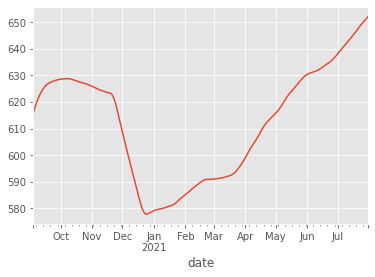

In [91]:
# 相互フォロ陽
plotMovingAverage(df.mutual_friends_count)陽

<AxesSubplot:xlabel='date'>

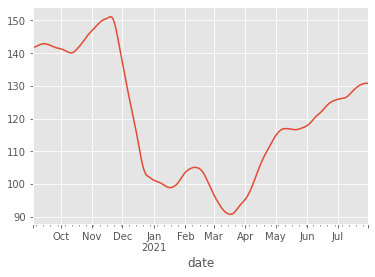

In [94]:
# 非アクティブユーザ数
plotMovingAverage(df.inactive_count)

In [95]:
df.create_follower_count

date
2020-08-17     2
2020-08-18     4
2020-08-19     0
2020-08-20     5
2020-08-21     9
              ..
2021-08-13     5
2021-08-14    13
2021-08-15    28
2021-08-16    19
2021-08-17     5
Name: create_follower_count, Length: 366, dtype: int64

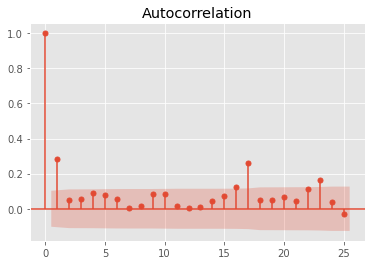

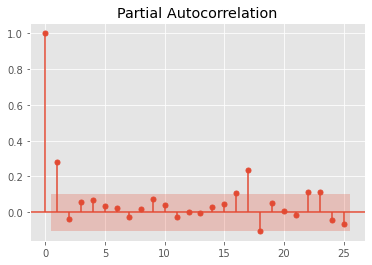

In [118]:
# 新規フォロワー数のcorrelogram
fig = sm.graphics.tsa.plot_acf(df.create_follower_count, lags=25)
fig = sm.graphics.tsa.plot_pacf(df.create_follower_count, lags=25)

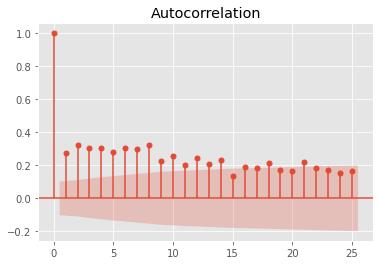

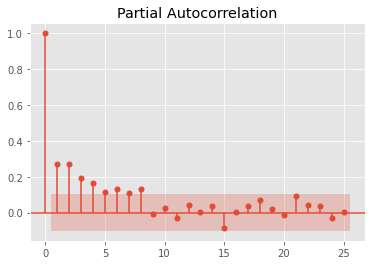

In [119]:
# 解除フォロワー数のcorrelogram
fig = sm.graphics.tsa.plot_acf(df.destroy_follower_count, lags=25)
fig = sm.graphics.tsa.plot_pacf(df.destroy_follower_count, lags=25)

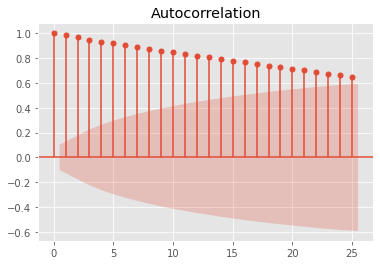

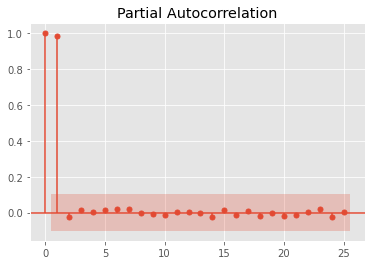

In [120]:
# 解除フォロワー数のcorrelogram
fig = sm.graphics.tsa.plot_acf(df.mutual_friends_count, lags=25)
fig = sm.graphics.tsa.plot_pacf(df.mutual_friends_count, lags=25)